In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import seaborn as sns

names_bw=['time', 'bw', 'op1', 'size', 'op2' ]
names_latency=['op1', 'latency', 'op2', 'write_size', 'op3']

## Zoned, 200GB, 4K

### HM-LS: BW and Latency

In [43]:
df_latency = pd.read_csv("lsdm/zoned/200GB/qd1/bs4KB/round2/lat_log_lat.1.log", sep=",", names=names_latency)
#process the bw data
df_latency['latency'] = df_latency['latency'] / (1000 *1000)  # Convert nanoseconds to milliseconds
# Calculate cumulative GBs of data written
df_latency['cumulative_gb'] = df_latency['write_size'].cumsum() / (1024**3)

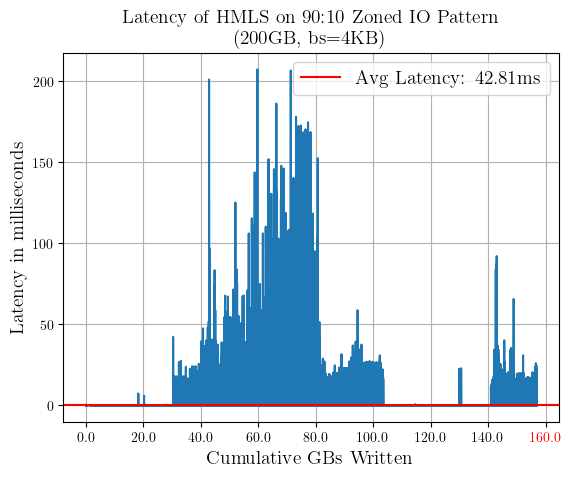

In [48]:
#Create the line plots
# plt.plot(df1.index, df1['latency'], linestyle='-')
# plt.figure(figsize=(5, 5))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.plot(df_latency['cumulative_gb'], df_latency['latency'], linestyle='-')

# Add labels and title
plt.xlabel('Cumulative GBs Written', fontsize=14)

xticks = np.arange(0, df_latency['cumulative_gb'].to_list()[-1] + 10 , 20)

xtick_labels = [str(x) for x in xticks]
label_formats = [r'$\mathrm{%s}$' % label if i != len(xtick_labels) else r'$\mathbf{\color{red}{%s}}$' % label for i, label in enumerate(xtick_labels)]

plt.xticks(xticks, label_formats)
plt.ylabel('Latency in milliseconds', fontsize=14)

# plt.yticks(np.arange(0, 25000, 2500))
plt.title('Latency of HMLS on 90:10 Zoned IO Pattern\n(200GB, bs=4KB)', fontsize=14)
#set figure size
average_latency = df_latency['latency'].mean()
average_latency_str = str(round(average_latency*1000, 2)) + 'ms'
plt.axhline(y=average_latency, color='r', linestyle='-', label='Avg Latency: ' + average_latency_str)
labels = plt.gca().get_xticklabels()
label_to_change = labels[-1].set_color('red')
plt.legend(loc='upper right', fontsize=14)
# Show the plot
plt.grid(True)  # Optionally, add grid lines
plt.savefig('fig/final/hmls_zoned_200gb_4kb_90_10_latency.png', bbox_inches='tight')
plt.show()

--------

### HM-Hybrid BW and Latency

In [49]:
df_latency = pd.read_csv("dm-zoned/zoned/200GB/qd1/bs4K/lat_log_lat.1.log", sep=",", names=names_latency)

#process the bw data
df_latency['latency'] = df_latency['latency'] / (1000*1000)  # Convert nanoseconds to microseconds
# Calculate cumulative GBs of data written
df_latency['cumulative_gb'] = df_latency['write_size'].cumsum() / (1024**3)

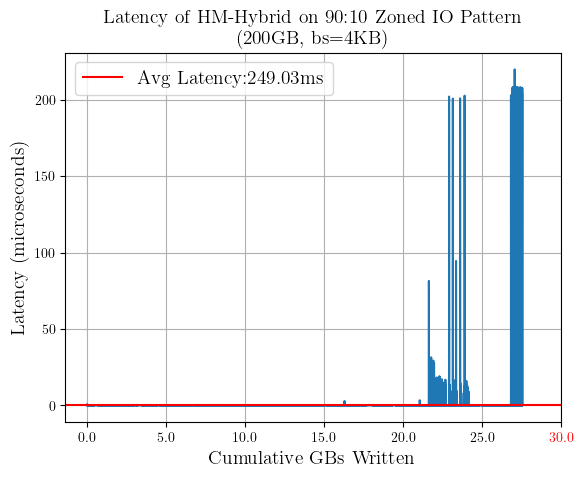

In [50]:
#Create the line plots
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.plot(df_latency['cumulative_gb'], df_latency['latency'], linestyle='-')
# Add X axis labels and title
plt.xlabel('Cumulative GBs Written', fontsize=14)
#Make xtick labels and color the last one red
xticks = np.arange(0, df_latency['cumulative_gb'].to_list()[-1] + 5 , 5)
xtick_labels = [str(x) for x in xticks]
label_formats = [r'$\mathrm{%s}$' % label if i != len(xtick_labels) else r'$\mathbf{\color{red}{%s}}$' % label for i, label in enumerate(xtick_labels)]
plt.xticks(xticks, label_formats)

# Y-axis label
plt.ylabel('Latency (microseconds)', fontsize=14)
# Title the graph
plt.title('Latency of HM-Hybrid on 90:10 Zoned IO Pattern\n(200GB, bs=4KB)', fontsize=14)

#Make the average latency line
average_latency = df_latency['latency'].mean()
average_latency_str = str(round(average_latency*1000, 2)) + 'ms'
plt.axhline(y=average_latency, color='r', linestyle='-', label='Avg Latency:' + average_latency_str)
labels = plt.gca().get_xticklabels()
label_to_change = labels[-1].set_color('red')
plt.legend(loc='upper left', fontsize=14)


# Show the plot
plt.grid(True)  # Optionally, add grid lines
plt.savefig('fig/final/hmhybrid_zoned_200gb_4kb_90_10_latency.png', bbox_inches='tight')
plt.show()

---------------

### DM-Hybrid BW and Latency
AWAIT